## 01 - Access data cubes in DeepESDL public object storage
### A DeepESDL example notebook 

This concise notebook demonstrates how xcubes data stores provide convenient access to the published data cubes, generated by the Cube Gen team and persisted on object storage. The recipes used in the generation process are publicly available at in the [Cube Gen repository](https://github.com/deepesdl/cube-gen). 

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.3.1`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [1]:
import xcube

In [2]:
xcube.__version__

'1.3.1'

In [3]:
from xcube.core.store import new_data_store
store = new_data_store("s3", root="deep-esdl-public", storage_options=dict(anon=True))
store.list_data_ids()

['LC-1x2160x2160-1.0.0.levels',
 'SMOS-freezethaw-1x720x720-1.0.1.zarr',
 'SMOS-freezethaw-4267x10x10-1.0.1.zarr',
 'black-sea-1x1024x1024.levels',
 'black-sea-256x128x128.zarr',
 'esa-cci-permafrost-1x1151x1641-0.0.2.levels',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'hydrology-1D-0.009deg-100x60x60-3.0.2.zarr',
 'hydrology-1D-0.009deg-1418x70x76-2.0.0.zarr',
 'hydrology-1D-0.009deg-1x1102x2415-2.0.0.levels',
 'hydrology-1D-0.009deg-1x1102x966-3.0.2.levels',
 'ocean-1M-9km-1x1080x1080-1.4.0.levels',
 'ocean-1M-9km-64x256x256-1.4.0.zarr',
 'polar-100m-1x2048x2048-1.0.1.zarr']

## How to open .zarr from the datastore

In [4]:
cube = store.open_data('esdc-8d-0.25deg-1x720x1440-3.0.1.zarr')

In [5]:
cube

<xarray.Dataset>
Dimensions:                            (time: 1978, lat: 720, lon: 1440)
Coordinates:
  * lat                                (lat) float64 -89.88 -89.62 ... 89.88
  * lon                                (lon) float64 -179.9 -179.6 ... 179.9
  * time                               (time) datetime64[ns] 1979-01-05 ... 2...
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cot                                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cth                                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

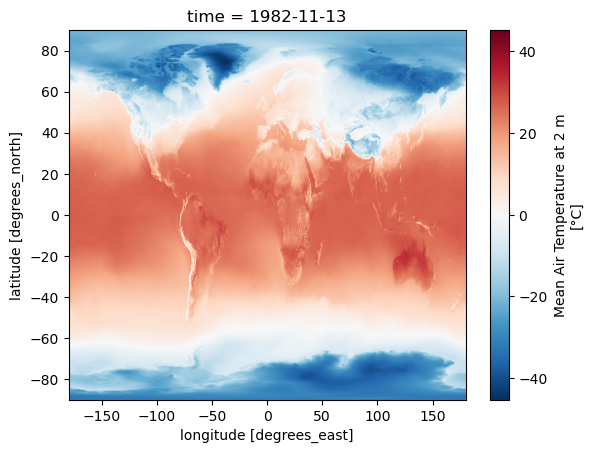

In [6]:
cube.air_temperature_2m.isel(time=177).plot()

## How to open a .levels from the datastore

.levels are [xcube Multi-Resolution Datasets](https://xcube.readthedocs.io/en/latest/mldatasets.html) which store different resolutions of a dataset as a pyramid for fast visualisation e.g. in xcube viewer.
If you see in an s3 store a dataset name with both extesions, zarr and levels, then the zarr dataset is the base layer with the higehst resolution and used in the .levels as a link.

In [7]:
ml_dataset = store.open_data('LC-1x2160x2160-1.0.0.levels')

To find out how many levels are available:#

In [8]:
ml_dataset.num_levels

6

Display information about all dataset levels, note how the lat and lon shape changes per level:

In [9]:
for level in range(ml_dataset.num_levels):
    dataset_i = ml_dataset.get_dataset(level)
    display(dataset_i)

<xarray.Dataset>
Dimensions:              (time: 11, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(11,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset>
Dimensions:              (time: 11, lat: 32400, lon: 64800, bounds: 2)
Coordinates:
  * lat                  (lat) float64 90.0 89.99 89.98 ... -89.99 -89.99 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset>
Dimensions:              (time: 11, lat: 16200, lon: 32400, bounds: 2)
Coordinates:
  * lat                  (lat) float64 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset>
Dimensions:              (time: 11, lat: 8100, lon: 16200, bounds: 2)
Coordinates:
  * lat                  (lat) float64 89.98 89.96 89.93 ... -89.95 -89.98 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset>
Dimensions:              (time: 11, lat: 4050, lon: 8100, bounds: 2)
Coordinates:
  * lat                  (lat) float64 89.96 89.91 89.87 ... -89.91 -89.95 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

<xarray.Dataset>
Dimensions:              (time: 11, lat: 2025, lon: 4050, bounds: 2)
Coordinates:
  * lat                  (lat) float64 89.91 89.82 89.73 ... -89.82 -89.91 -90.0
  * lon                  (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2025, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2025, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

Get a dataset at a certain level to continue analysis with it. 

In [10]:
dataset_i = ml_dataset.get_dataset(2)

In [11]:
dataset_i

<xarray.Dataset>
Dimensions:              (time: 11, lat: 16200, lon: 32400, bounds: 2)
Coordinates:
  * lat                  (lat) float64 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y